In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text

In [59]:
db_user = 'postgres'
db_password = '123456'
db_host = 'localhost'
db_port = '5432'
db_name = 'nordic_co2'

engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

In [51]:
denmark = pd.read_csv('denmark/DK_SUMMARY.csv')
finland = pd.read_csv('finland/FI_SUMMARY.csv')
iceland = pd.read_csv('iceland/IS_SUMMARY.csv')
norway = pd.read_csv('norway/NO_SUMMARY.csv')
sweden = pd.read_csv('sweden/SE_SUMMARY.csv')

In [52]:
denmark.rename(columns={'year_':'year'}, inplace=True)
finland.rename(columns={'year_':'year'}, inplace=True)
iceland.rename(columns={'year_':'year'}, inplace=True)
norway.rename(columns={'year_':'year'}, inplace=True)
sweden.rename(columns={'year_':'year'}, inplace=True)

In [53]:
denmark.dtypes

year                              int64
country                          object
zone_id                          object
month_grouped                     int64
total_direct_carbon_emission    float64
next_direct_carbon_emission     float64
direct_decrease_or_increase     float64
total_lca_carbon_emission       float64
next_lca_carbon_emission        float64
lca_decrease_or_increase        float64
avg_renewable_percentage        float64
avg_low_carbon_percentage       float64
dtype: object

In [54]:
dfs = [denmark.groupby('year')['total_direct_carbon_emission'].sum().reset_index(), 
       finland.groupby('year')['total_direct_carbon_emission'].sum().reset_index(), 
       iceland.groupby('year')['total_direct_carbon_emission'].sum().reset_index(), 
       norway.groupby('year')['total_direct_carbon_emission'].sum().reset_index(), 
       sweden.groupby('year')['total_direct_carbon_emission'].sum().reset_index()]

names = [
    'Dinamarca - Emissões Diretas de gCO₂eq/kWh',
    'Finlândia - Emissões Diretas de gCO₂eq/kWh',
    'Islândia - Emissões Diretas de gCO₂eq/kWh',
    'Noruega - Emissões Diretas de gCO₂eq/kWh',
    'Suécia - Emissões Diretas de gCO₂eq/kWh'
]

In [55]:
denmark.groupby('year')['total_direct_carbon_emission'].sum().reset_index()

,year,total_direct_carbon_emission
0,2021,1270629.89
1,2022,1108158.95
2,2023,696515.79
3,2024,696515.79


In [56]:
finland.total_direct_carbon_emission.sum()

2766194.31

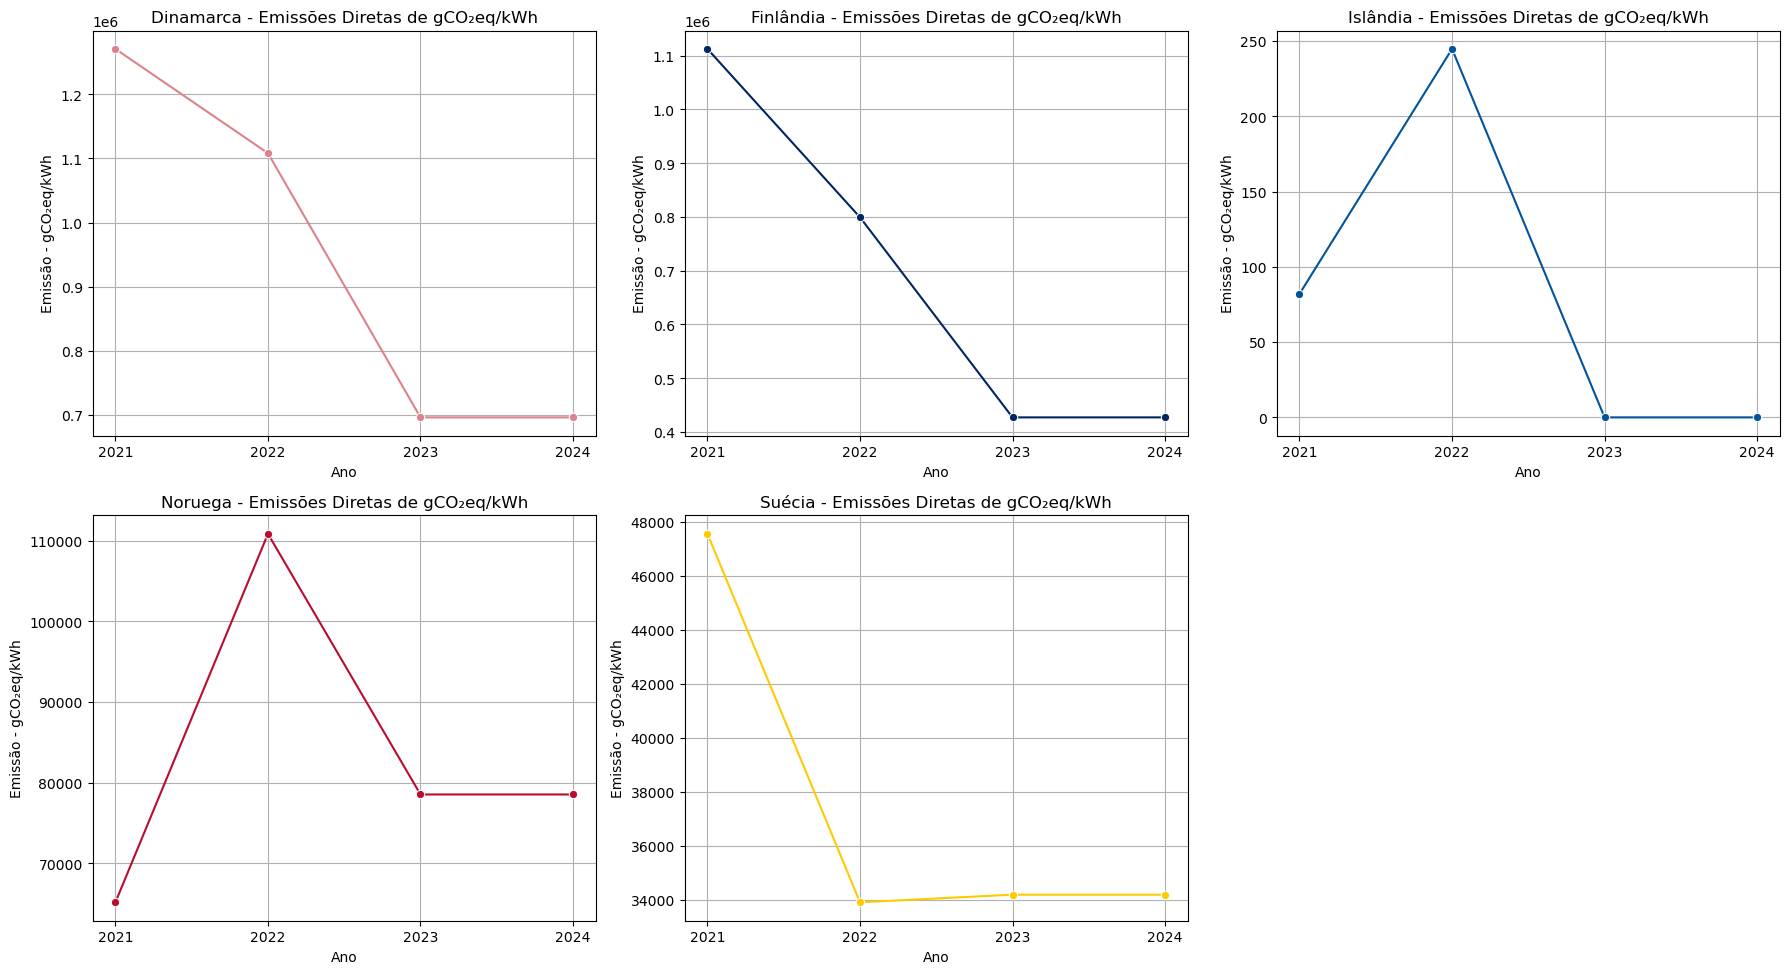

In [57]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

colors = ['#dd828c', '#002564', '#03529c', '#ba0c2f', '#fecb00']

for i, (df, name) in enumerate(zip(dfs, names)):
    sns.lineplot(data=df, x='year', y='total_direct_carbon_emission', ax=axs[i], marker='o', errorbar=None, color=colors[i])
    axs[i].set_title(name)
    axs[i].set_xlabel('Ano')
    axs[i].set_ylabel('Emissão - gCO₂eq/kWh')
    axs[i].grid(True)
    axs[i].set_xticks(df['year'].unique())
    axs[i].set_xticklabels(df['year'].unique().astype(int))

fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()